In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder


In [7]:
df = pd.read_csv("data/FWI_Dataset.csv")

print("First 5 rows:")
display(df.head())

print("\nDataset Info:")
display(df.info())

print("\nMissing Values:")
print(df.isnull().sum())
df = df.dropna()

First 5 rows:


,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
0,1,6,2012,29,57,18,0.0,65.7,3.4,7.6,1.3,3.4,0.5,not fire,Bejaia
1,2,6,2012,29,61,13,1.3,64.4,4.1,7.6,1.0,3.9,0.4,not fire,Bejaia
2,3,6,2012,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,not fire,Bejaia
3,4,6,2012,25,89,13,2.5,28.6,1.3,6.9,0.0,1.7,0,not fire,Bejaia
4,5,6,2012,27,77,16,0.0,64.8,3.0,14.2,1.2,3.9,0.5,not fire,Bejaia



Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 244 entries, 0 to 243
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   day          244 non-null    int64  
 1   month        244 non-null    int64  
 2   year         244 non-null    int64  
 3   Temperature  244 non-null    int64  
 4    RH          244 non-null    int64  
 5    Ws          244 non-null    int64  
 6   Rain         244 non-null    float64
 7   FFMC         244 non-null    float64
 8   DMC          244 non-null    float64
 9   DC           244 non-null    object 
 10  ISI          244 non-null    float64
 11  BUI          244 non-null    float64
 12  FWI          244 non-null    object 
 13  Classes      243 non-null    object 
 14  Region       244 non-null    object 
dtypes: float64(5), int64(6), object(4)
memory usage: 28.7+ KB


None


Missing Values:
day            0
month          0
year           0
Temperature    0
 RH            0
 Ws            0
Rain           0
FFMC           0
DMC            0
DC             0
ISI            0
BUI            0
FWI            0
Classes        1
Region         0
dtype: int64


In [8]:
df.columns = df.columns.str.strip()
print("Cleaned Columns:", df.columns.tolist())

df['Classes'] = df['Classes'].fillna(df['Classes'].mode()[0])

df.drop(columns=['Classes'], inplace=True)

print("Missing values after cleaning:")
print(df.isnull().sum())

df.head()


Cleaned Columns: ['day', 'month', 'year', 'Temperature', 'RH', 'Ws', 'Rain', 'FFMC', 'DMC', 'DC', 'ISI', 'BUI', 'FWI', 'Classes', 'Region']
Missing values after cleaning:
day            0
month          0
year           0
Temperature    0
RH             0
Ws             0
Rain           0
FFMC           0
DMC            0
DC             0
ISI            0
BUI            0
FWI            0
Region         0
dtype: int64


,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Region
0,1,6,2012,29,57,18,0.0,65.7,3.4,7.6,1.3,3.4,0.5,Bejaia
1,2,6,2012,29,61,13,1.3,64.4,4.1,7.6,1.0,3.9,0.4,Bejaia
2,3,6,2012,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,Bejaia
3,4,6,2012,25,89,13,2.5,28.6,1.3,6.9,0.0,1.7,0,Bejaia
4,5,6,2012,27,77,16,0.0,64.8,3.0,14.2,1.2,3.9,0.5,Bejaia


In [12]:
df['FWI'] = pd.to_numeric(df['FWI'], errors='coerce')
df['DC']  = pd.to_numeric(df['DC'], errors='coerce')
print(df[['FWI', 'DC']].dtypes)

FWI    float64
DC     float64
dtype: object


In [13]:
df.to_csv("data/cleaned_fwi.csv", index=False)
print("Cleaned dataset saved as cleaned_fwi.csv")


Cleaned dataset saved as cleaned_fwi.csv


In [14]:
df = pd.read_csv("data/cleaned_fwi.csv")
print("Loaded Cleaned Dataset")
df.head()


Loaded Cleaned Dataset


,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Region
0,1,6,2012,29,57,18,0.0,65.7,3.4,7.6,1.3,3.4,0.5,Bejaia
1,2,6,2012,29,61,13,1.3,64.4,4.1,7.6,1.0,3.9,0.4,Bejaia
2,3,6,2012,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,Bejaia
3,4,6,2012,25,89,13,2.5,28.6,1.3,6.9,0.0,1.7,0.0,Bejaia
4,5,6,2012,27,77,16,0.0,64.8,3.0,14.2,1.2,3.9,0.5,Bejaia


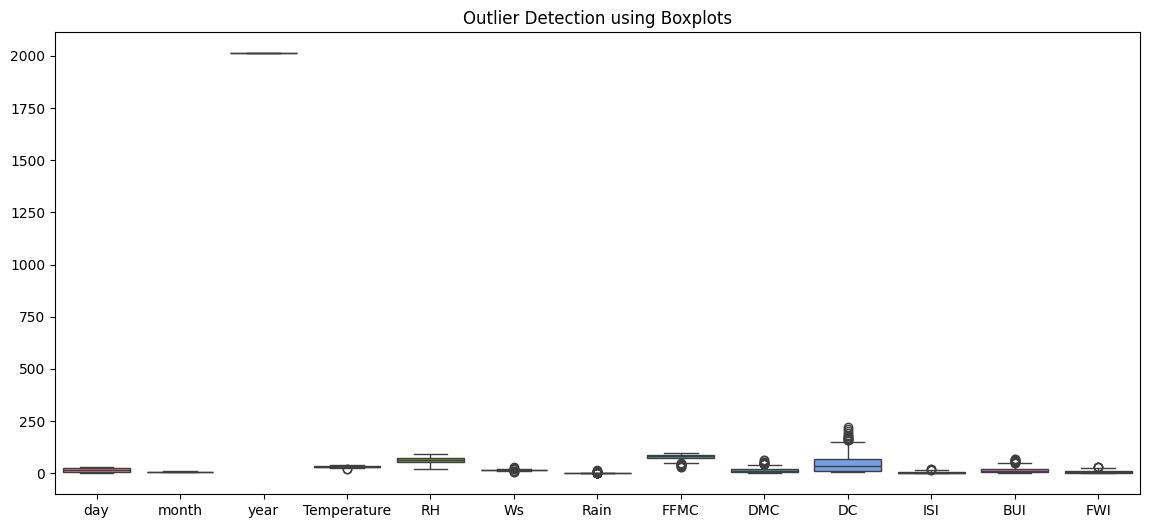

In [17]:
plt.figure(figsize=(14, 6))
sns.boxplot(data=df.select_dtypes(include=['int64', 'float64']), orient='v')
plt.title("Outlier Detection using Boxplots")
plt.show()


In [18]:
numeric_cols = df.select_dtypes(include=[np.number]).columns

for col in numeric_cols:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower = Q1 - 1.5 * IQR
    upper = Q3 + 1.5 * IQR
    df = df[(df[col] >= lower) & (df[col] <= upper)]

df = df.reset_index(drop=True)
print("Shape after outlier removal:", df.shape)


Shape after outlier removal: (155, 14)


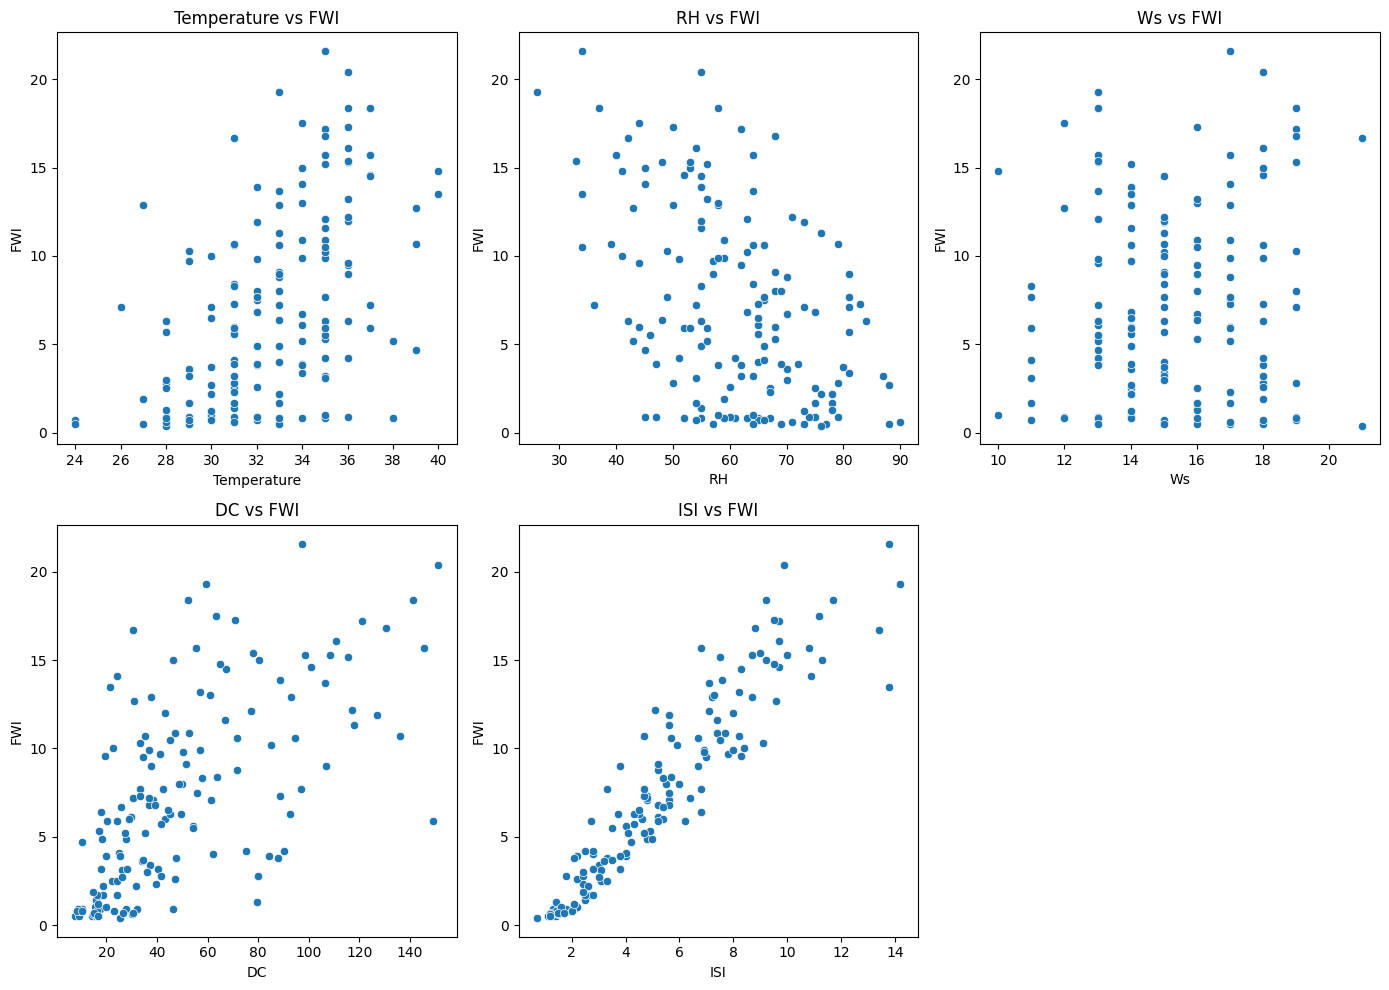

In [19]:
plt.figure(figsize=(14, 10))

features = ['Temperature', 'RH', 'Ws', 'DC', 'ISI']

for i, col in enumerate(features, 1):
    plt.subplot(2, 3, i)
    sns.scatterplot(x=df[col], y=df['FWI'])
    plt.title(f"{col} vs FWI")
    plt.xlabel(col)
    plt.ylabel("FWI")

plt.tight_layout()
plt.show()

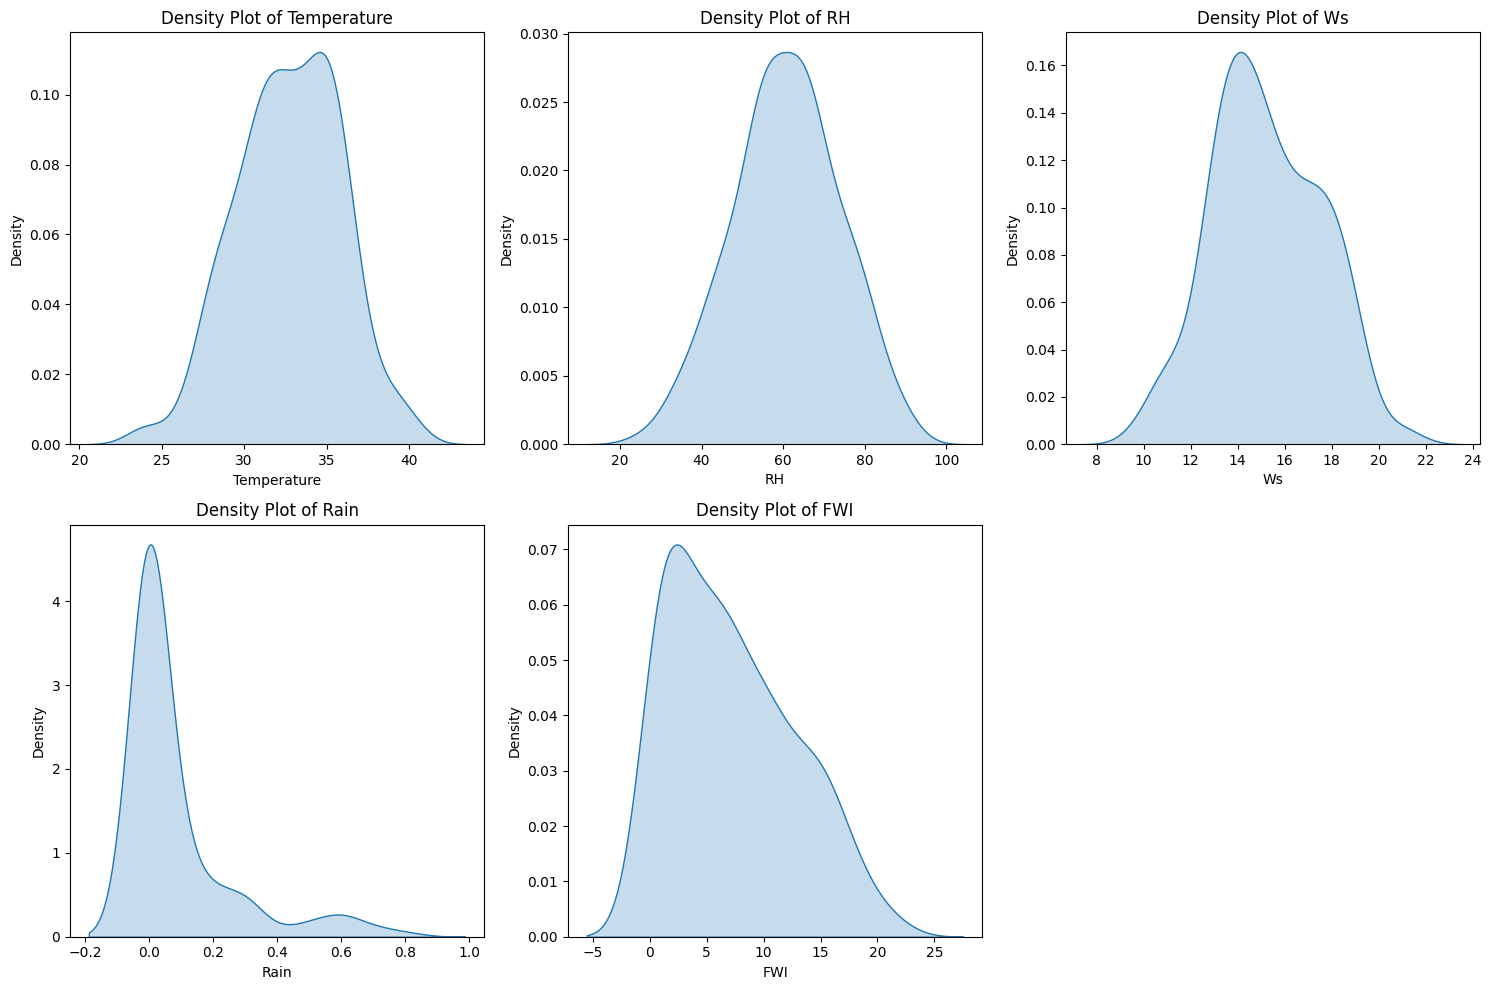

In [20]:
plt.figure(figsize=(15, 10))

num_cols = ['Temperature', 'RH', 'Ws', 'Rain', 'FWI']

for i, col in enumerate(num_cols, 1):
    plt.subplot(2, 3, i)
    sns.kdeplot(df[col], fill=True)
    plt.title(f"Density Plot of {col}")

plt.tight_layout()
plt.show()

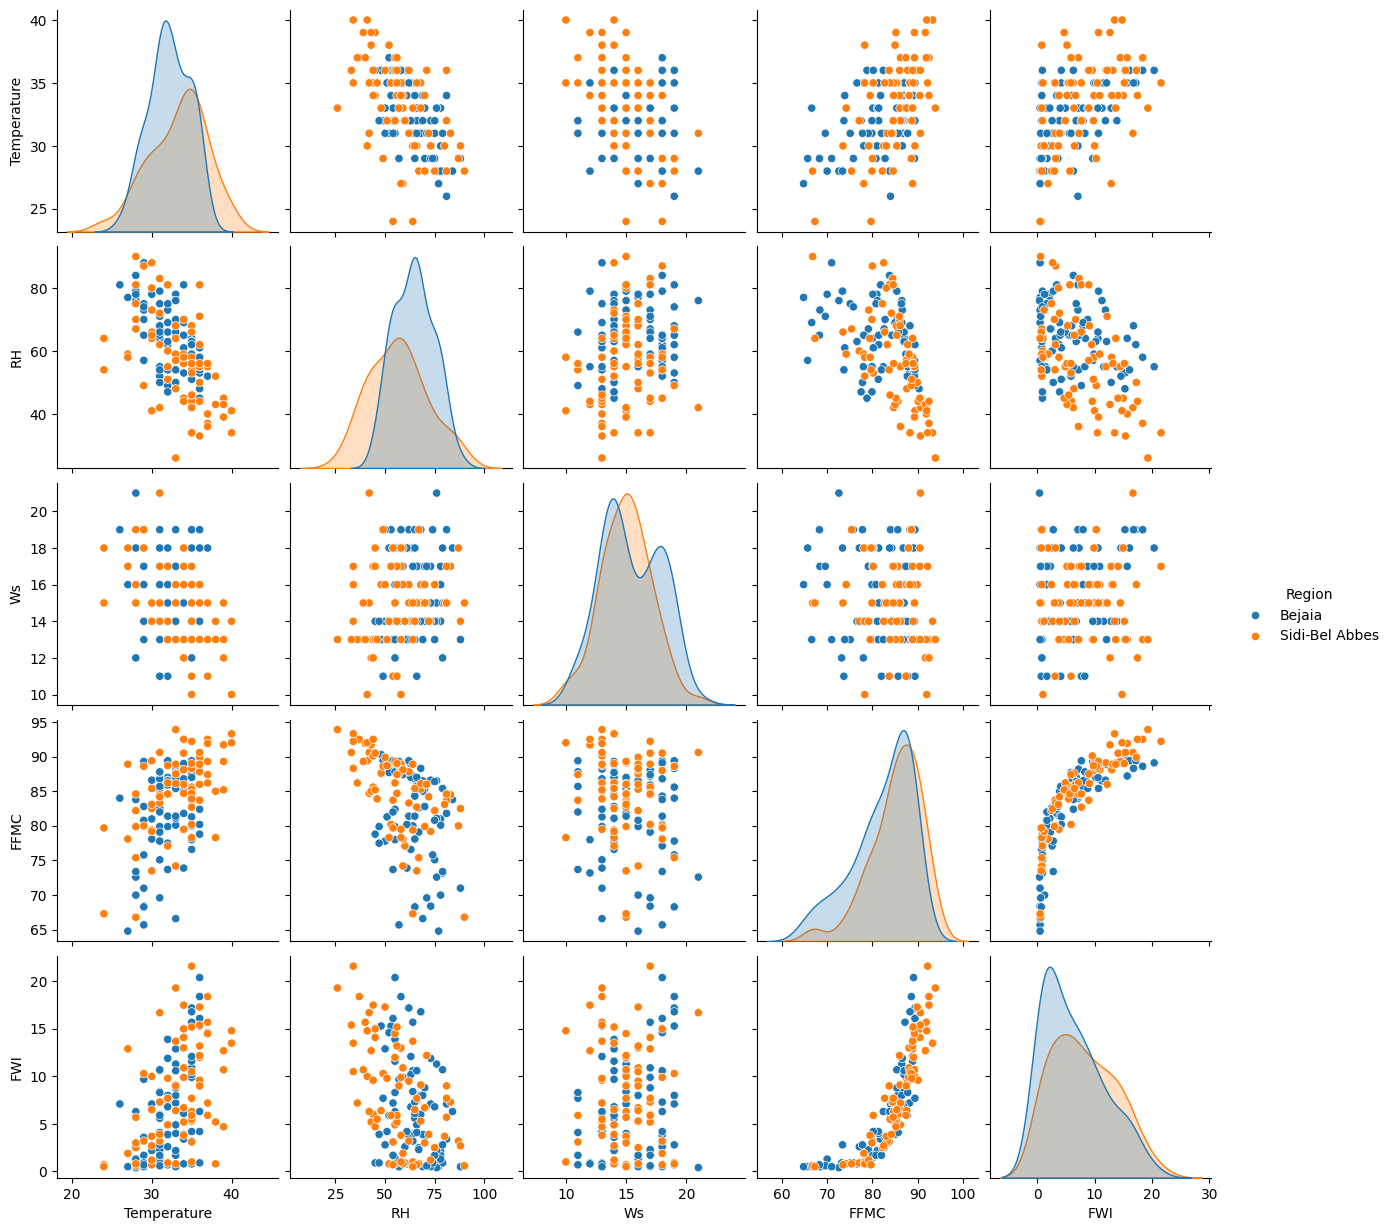

In [22]:
sns.pairplot(df[['Temperature', 'RH', 'Ws', 'FFMC', 'FWI', 'Region']],
             hue='Region')
plt.show()



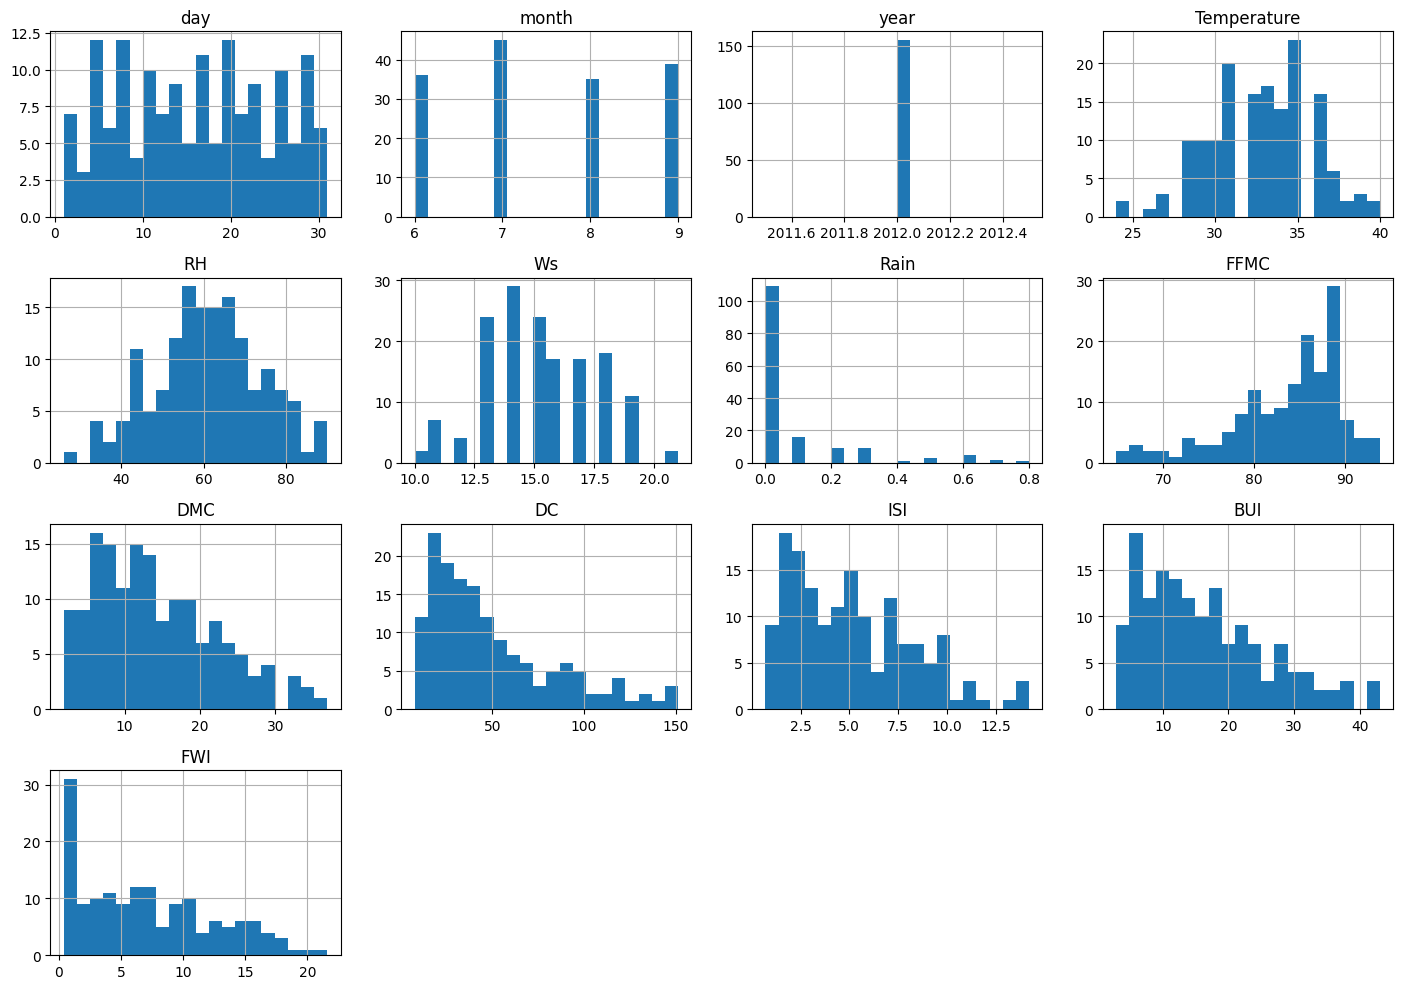

In [23]:
df.hist(figsize=(14, 10), bins=20)
plt.tight_layout()
plt.show()


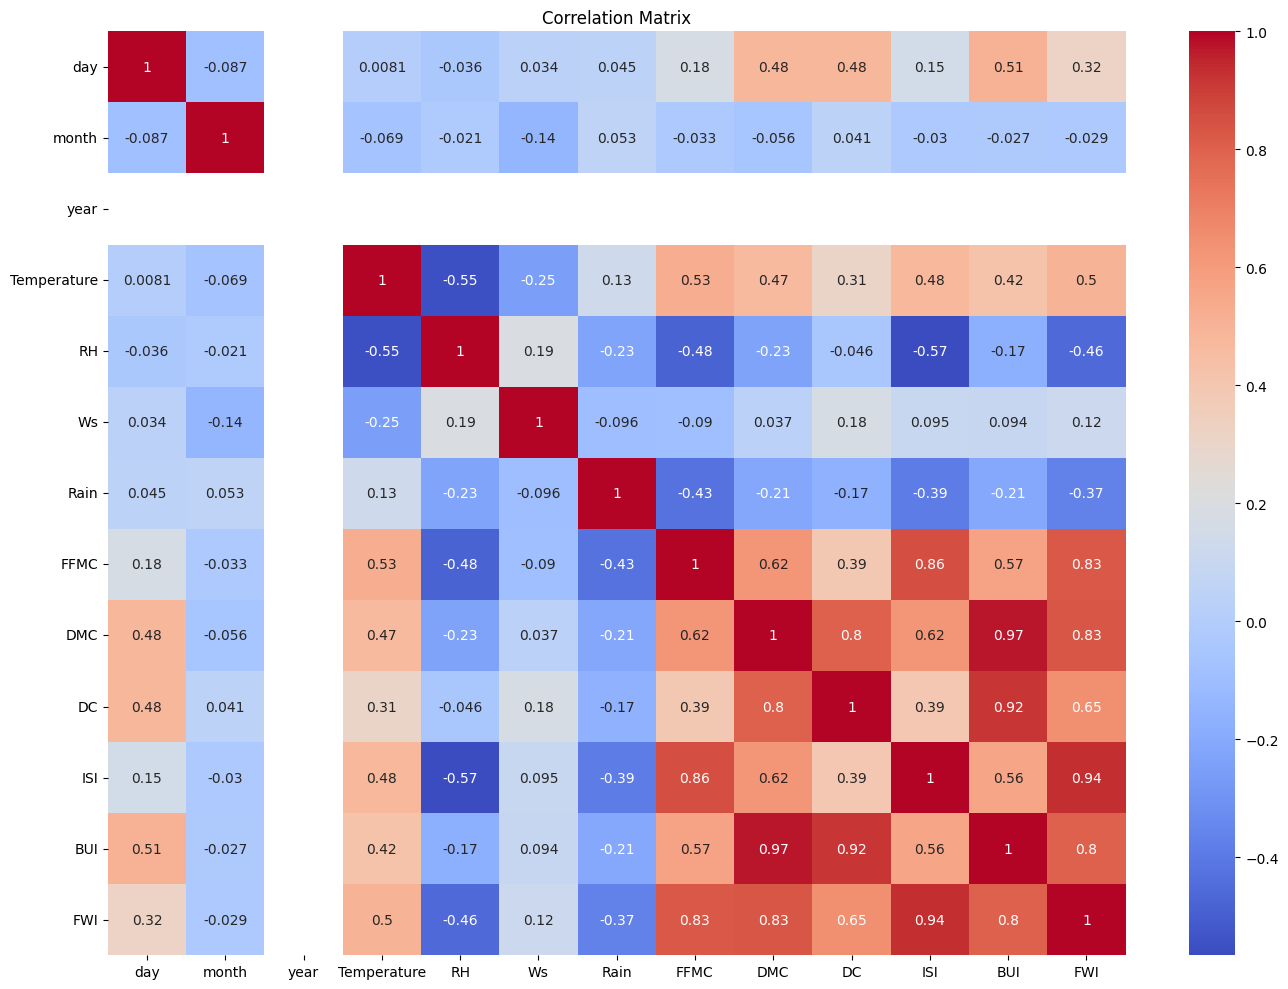

In [27]:
plt.figure(figsize=(14, 10))  
numeric_df = df.select_dtypes(include=['int64', 'float64'])
sns.heatmap(numeric_df.corr(), annot=True, cmap='coolwarm')
plt.title("Correlation Matrix")
plt.tight_layout()             
plt.show()


In [28]:
if 'Region' in df.columns:
    le_region = LabelEncoder()
    df['Region'] = le_region.fit_transform(df['Region'].astype(str))
    print("Region column encoded!")
else:
    print("Region column not found!")


Region column encoded!


In [29]:
df.to_csv("data/preprocessed_fwi.csv", index=False)
print("Saved as preprocessed_fwi.csv")


Saved as preprocessed_fwi.csv


# milestone_2

In [2]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import pickle


In [3]:
df = pd.read_csv("data/preprocessed_fwi.csv")
df.head()


,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Region
0,1,6,2012,29,57,18,0.0,65.7,3.4,7.6,1.3,3.4,0.5,0
1,5,6,2012,27,77,16,0.0,64.8,3.0,14.2,1.2,3.9,0.5,0
2,6,6,2012,31,67,14,0.0,82.6,5.8,22.2,3.1,7.0,2.5,0
3,7,6,2012,33,54,13,0.0,88.2,9.9,30.5,6.4,10.9,7.2,0
4,8,6,2012,30,73,15,0.0,86.6,12.1,38.3,5.6,13.5,7.1,0


In [4]:
corr = df.corr(numeric_only=True)['FWI'].abs()

selected_features = corr[corr > 0.3].index.tolist()

selected_features.remove('FWI')

if 'day' in selected_features:
    selected_features.remove('day')

if 'Ws' not in selected_features:
    selected_features.append('Ws')

X = df[selected_features]
y = df['FWI']

print("selected features:")
print(X.columns.tolist())


selected features:
['Temperature', 'RH', 'Rain', 'FFMC', 'DMC', 'DC', 'ISI', 'BUI', 'Ws']


In [5]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

In [6]:
scaler = StandardScaler()

X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [7]:
with open("scaler.pkl", "wb") as f:
    pickle.dump(scaler, f)

In [8]:
print("Training data shape:", X_train_scaled.shape)
print("Testing data shape:", X_test_scaled.shape)

Training data shape: (124, 9)
Testing data shape: (31, 9)


In [9]:
from sklearn.linear_model import Ridge
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np
import pickle
from sklearn.linear_model import LinearRegression, Lasso, ElasticNet
from sklearn.tree import DecisionTreeRegressor
import matplotlib.pyplot as plt

In [10]:
ridge_model = Ridge(alpha=1.0)

ridge_model.fit(X_train_scaled, y_train)


,alpha,1.0
,fit_intercept,True
,copy_X,True
,max_iter,None
,tol,0.0001
,solver,'auto'
,positive,False
,random_state,None


In [11]:
y_pred_ridge= ridge_model.predict(X_test_scaled)

In [12]:
ridge_mae = mean_absolute_error(y_test, y_pred_ridge)
ridge_rmse = np.sqrt(mean_squared_error(y_test, y_pred_ridge))
ridge_r2 = r2_score(y_test, y_pred_ridge)

print("Mean Absolute Error (MAE):", ridge_mae)
print("Root Mean Squared Error (RMSE):", ridge_rmse)
print("R2 Score:", ridge_r2)

Mean Absolute Error (MAE): 0.3449895951634342
Root Mean Squared Error (RMSE): 0.5023559930222369
R2 Score: 0.9902192469980509


In [13]:
from sklearn.ensemble import RandomForestRegressor
models = {
    "Linear Regression": LinearRegression(),
    "Lasso Regression": Lasso(alpha=0.1),
    "ElasticNet": ElasticNet(alpha=0.1),
    "Decision Tree": DecisionTreeRegressor(random_state=42),
    "Random Forest": RandomForestRegressor(random_state=42)
}

results = []

for name, model in models.items():
    model.fit(X_train_scaled, y_train)
    y_pred = model.predict(X_test_scaled)

    mae = mean_absolute_error(y_test, y_pred)
    rmse = np.sqrt(mean_squared_error(y_test, y_pred))
    r2 = r2_score(y_test, y_pred)

    results.append([name, mae, rmse, r2])

In [14]:
results.append(["Ridge Regression", ridge_mae, ridge_rmse, ridge_r2])
results_df = pd.DataFrame(
    results,
    columns=["Model", "MAE", "RMSE", "R2 Score"]
)

results_df

,Model,MAE,RMSE,R2 Score
0,Linear Regression,0.335598,0.486322,0.990834
1,Lasso Regression,0.302960,0.448134,0.992217
2,ElasticNet,0.412902,0.617974,0.985199
3,Decision Tree,0.709677,1.145820,0.949116
4,Random Forest,0.417258,0.636166,0.984315
5,Ridge Regression,0.344990,0.502356,0.990219


In [15]:
with open("ridge.pkl", "wb") as file:
    pickle.dump(ridge_model, file)


In [16]:
alphas = [0.1, 1, 10, 50, 100]

for a in alphas:
    model = Ridge(alpha=a)
    model.fit(X_train_scaled, y_train)
    pred = model.predict(X_test_scaled)
    r2 = r2_score(y_test, pred)
    print(f"Alpha: {a}, R2 Score: {r2}")

Alpha: 0.1, R2 Score: 0.9911186973335182
Alpha: 1, R2 Score: 0.9902192469980509
Alpha: 10, R2 Score: 0.9750408333445757
Alpha: 50, R2 Score: 0.9546157659943422
Alpha: 100, R2 Score: 0.9402603241986112


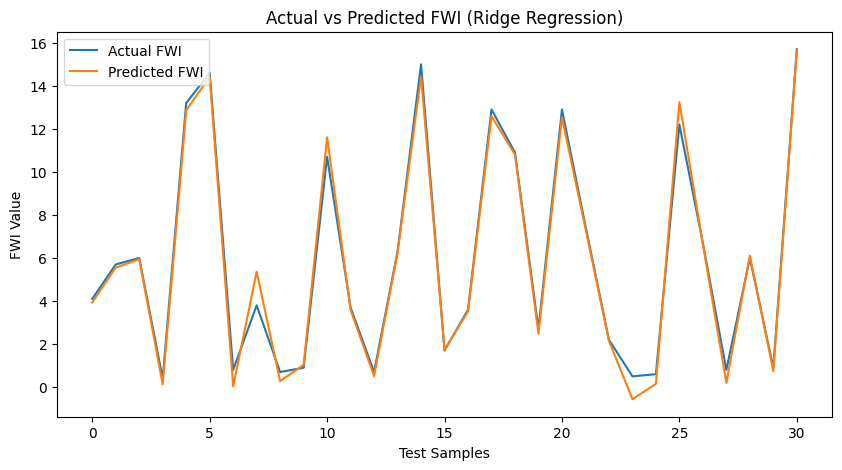

In [17]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 5))
plt.plot(y_test.values, label="Actual FWI")
plt.plot(y_pred_ridge, label="Predicted FWI")
plt.xlabel("Test Samples")
plt.ylabel("FWI Value")
plt.title("Actual vs Predicted FWI (Ridge Regression)")
plt.legend()
plt.show()

# Milestone_3

In [18]:
from sklearn.metrics import r2_score

y_train_pred = ridge_model.predict(X_train_scaled)
y_test_pred = ridge_model.predict(X_test_scaled)

train_r2 = r2_score(y_train, y_train_pred)
test_r2 = r2_score(y_test, y_test_pred)

print("Train R2 Score:", train_r2)
print("Test R2 Score:", test_r2)

Train R2 Score: 0.9880281948713446
Test R2 Score: 0.9902192469980509


In [19]:
y_pred = ridge_model.predict(X_test_scaled)

In [20]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np

mae = mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
r2 = r2_score(y_test, y_pred)

print("MAE:", mae)
print("RMSE:", rmse)
print("R2 Score:", r2)


MAE: 0.3449895951634342
RMSE: 0.5023559930222369
R2 Score: 0.9902192469980509


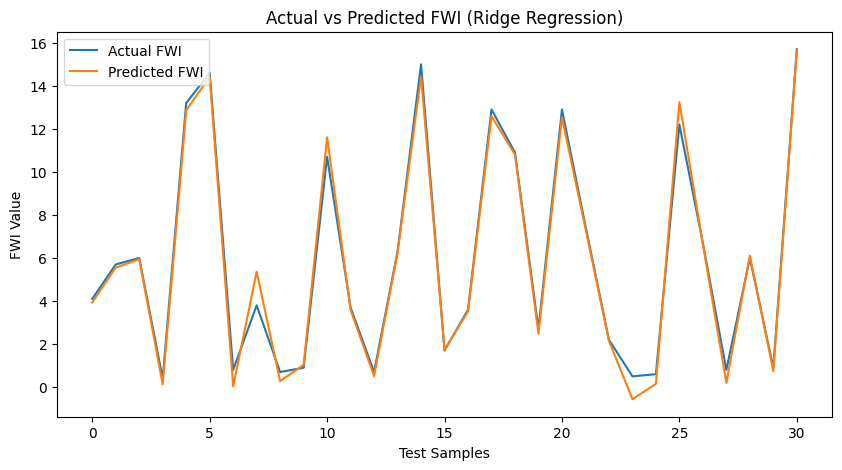

In [25]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 5))
plt.plot(y_test.values, label="Actual FWI")
plt.plot(y_pred_ridge, label="Predicted FWI")
plt.xlabel("Test Samples")
plt.ylabel("FWI Value")
plt.title("Actual vs Predicted FWI (Ridge Regression)")
plt.legend()
plt.show()


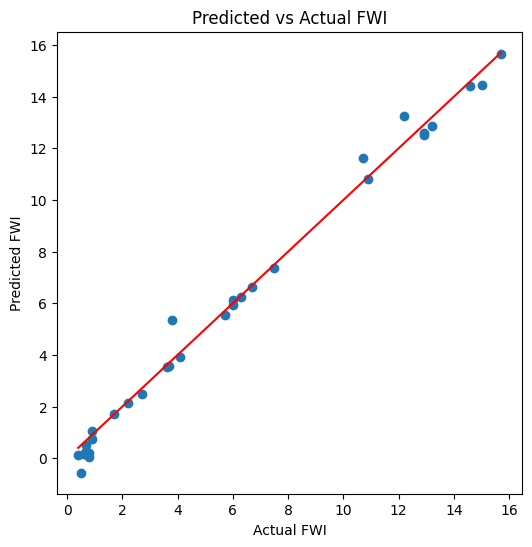

In [26]:
plt.figure(figsize=(6,6))
plt.scatter(y_test, y_pred)
plt.xlabel("Actual FWI")
plt.ylabel("Predicted FWI")
plt.title("Predicted vs Actual FWI")
plt.plot([y_test.min(), y_test.max()],
         [y_test.min(), y_test.max()],
         color='red')
plt.show()


In [22]:
from sklearn.linear_model import Ridge

alphas = [0.1, 1, 10, 50, 100]
r2_scores = []

for a in alphas:
    model = Ridge(alpha=a)
    model.fit(X_train_scaled, y_train)
    pred = model.predict(X_test_scaled)
    r2_scores.append(r2_score(y_test, pred))

for a, score in zip(alphas, r2_scores):
    print(f"Alpha: {a}, R2 Score: {score}")



Alpha: 0.1, R2 Score: 0.9911186973335182
Alpha: 1, R2 Score: 0.9902192469980509
Alpha: 10, R2 Score: 0.9750408333445757
Alpha: 50, R2 Score: 0.9546157659943422
Alpha: 100, R2 Score: 0.9402603241986112
